In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

In [2]:
df =pd.read_csv(r"C:\Users\heman\OneDrive\Documents\SEM_4\ML\Lab\4&5\Unemployment_in_India.csv")

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
None


In [5]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [6]:
# Display the number of missing values in each column
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64


Region with the highest unemployment rate: Tripura
Highest unemployment rate: 28.350357142857142
Region with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 4.7988888888888885


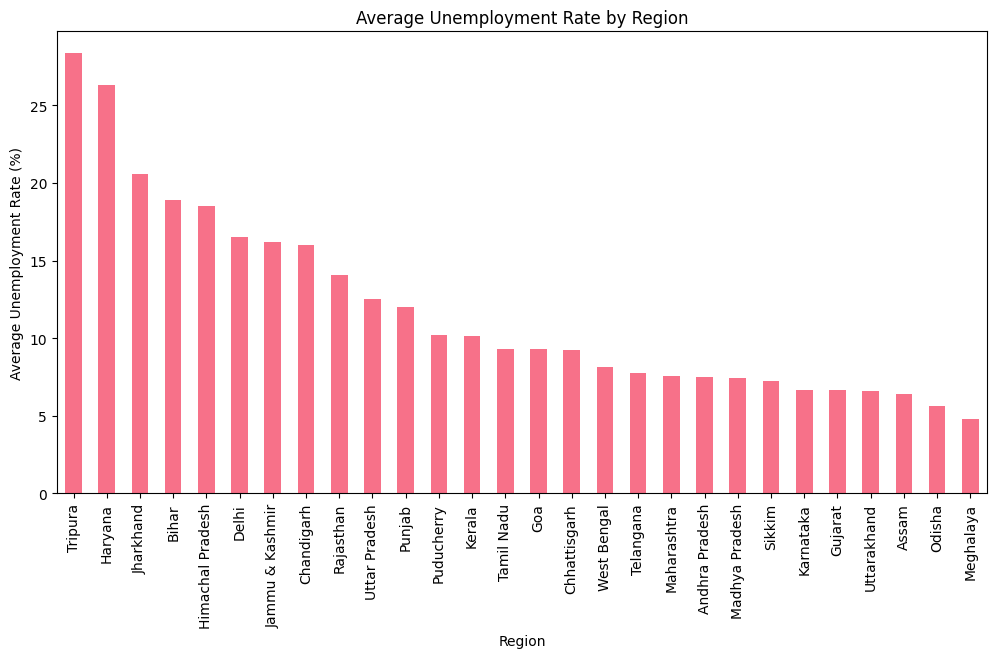

In [7]:
# Calculate the average unemployment rate by state
average_unemployment_rate = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

# Find the region with the highest unemployment rate
region_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()

# Find the region with the lowest unemployment rate
region_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()

print("Region with the highest unemployment rate:", region_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)
print("Region with the lowest unemployment rate:", region_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

# Plot the average unemployment rate by state
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("husl")

plt.figure(figsize=(12, 6))
average_unemployment_rate.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()


In [8]:
# Fill missing values in categorical columns with the mode
categorical_columns = ['Region', 'Date', 'Frequency', 'Area']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing values in numerical columns with the mean
numerical_columns = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

# Assuming you have your data loaded into pandas DataFrame named 'df'
# Let's split data into features (X) and target variable (y)
X = df[['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = df['Area']  # Assuming 'Area' is the target variable, make sure it's categorical

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

# Convert y to categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Importing KNeighborsClassifier and other necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Initializing and train KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)

# Make predictions
predictions = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)


Accuracy: 0.7929515418502202
Confusion Matrix:
[[104   0  15]
 [  0   0   0]
 [ 30   2  76]]


C:\Users\heman\AppData\Local\Temp\ipykernel_15024\3902346542.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\heman\AppData\Local\Temp\ipykernel_15024\3902346542.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])
C:\Users\heman\AppData\Local\Temp\ipykernel_15024\3902346542.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

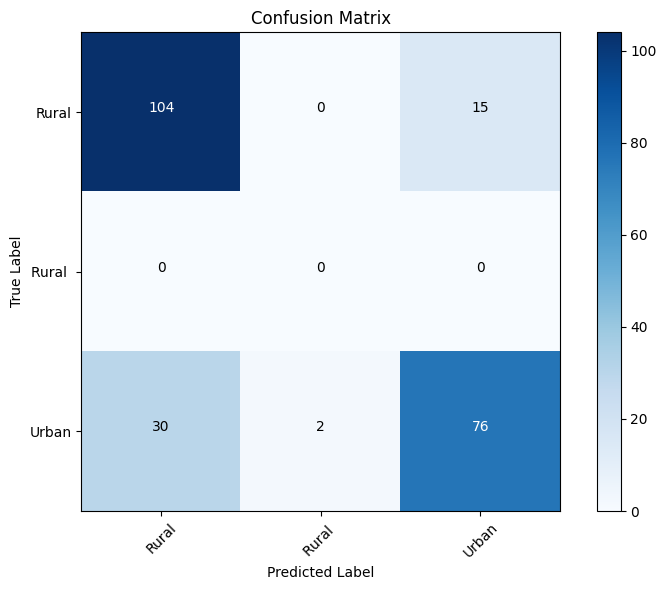

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


*******

# **Distribution of Region**

C:\Users\heman\AppData\Local\Temp\ipykernel_15024\673515454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='viridis')


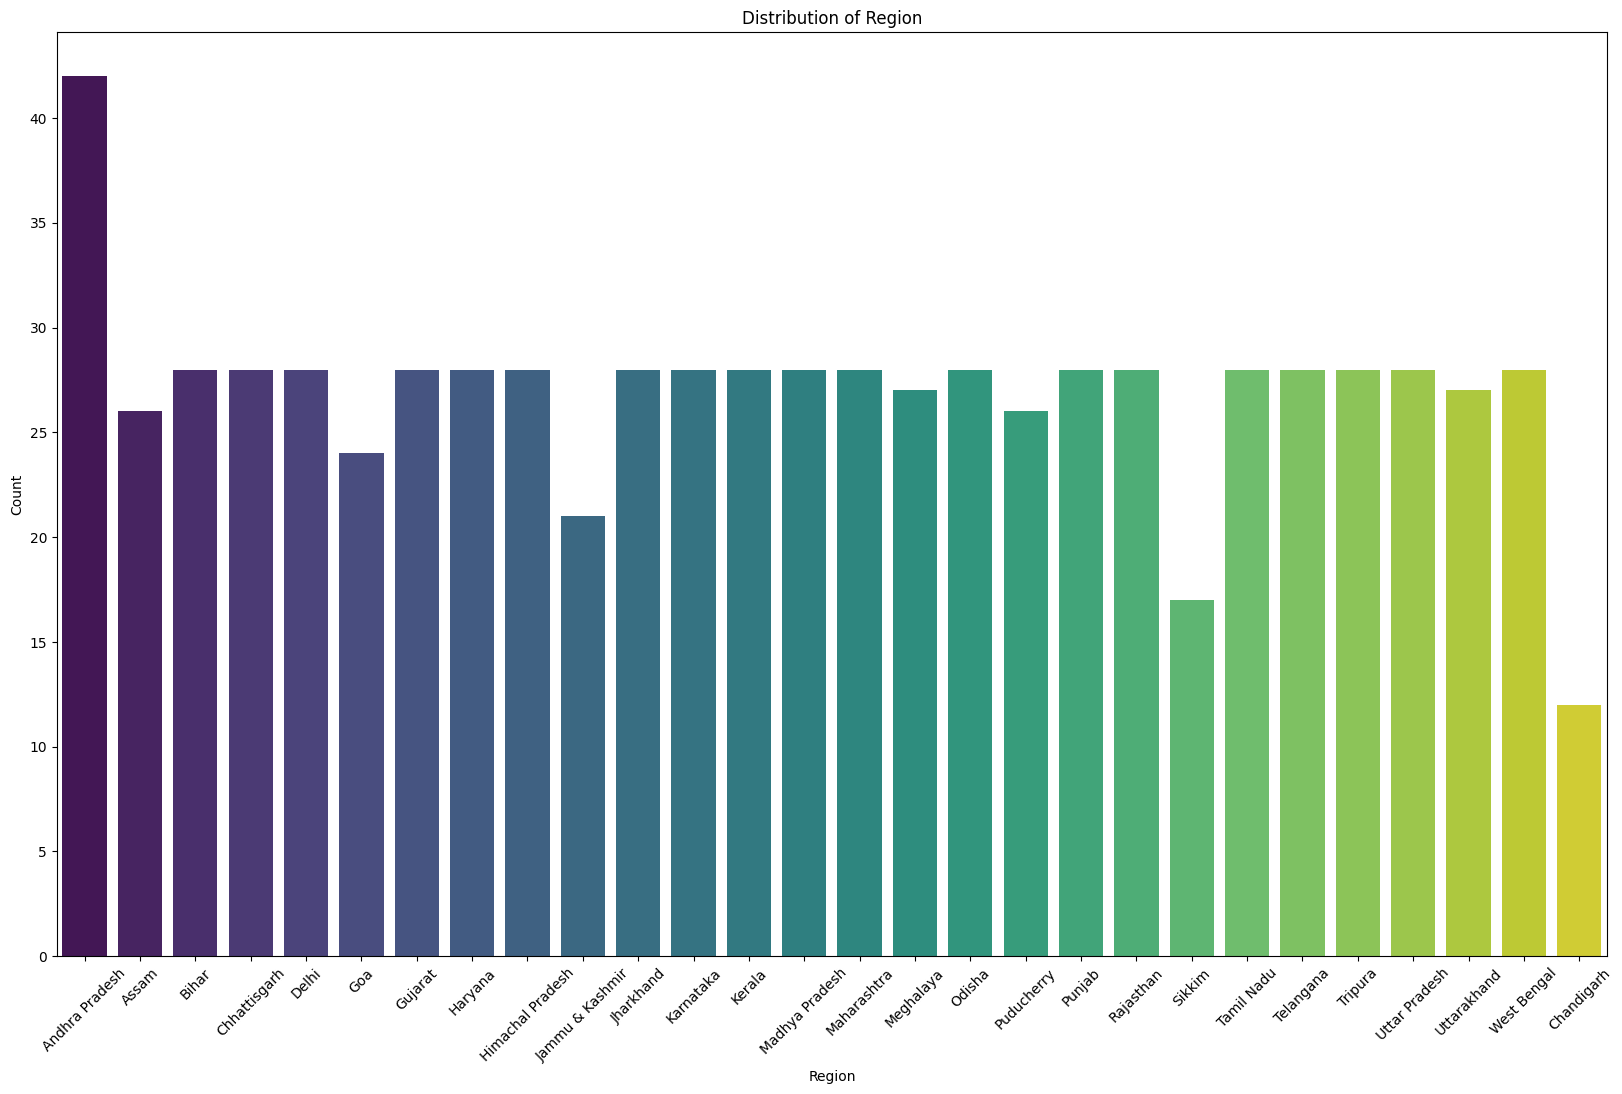

In [10]:
plt.figure(figsize=(20, 12))
sns.countplot(x='Region', data=df, palette='viridis')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Distribution of Frequency**

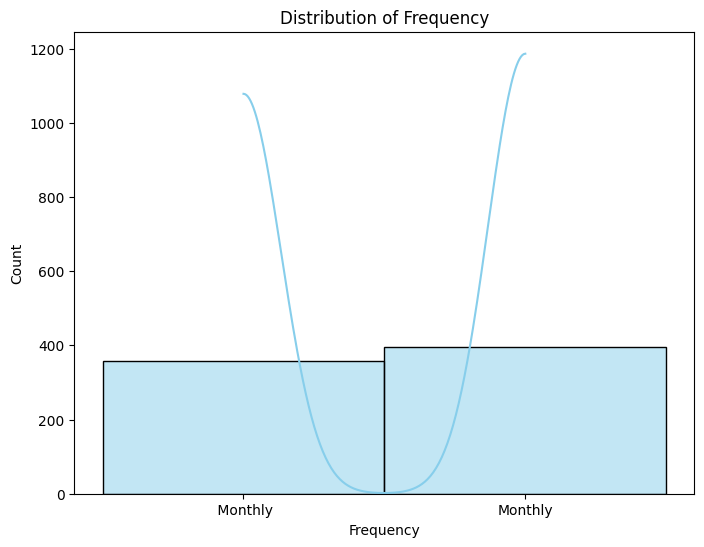

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Frequency'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# **Estimated Unemployment Rate (%) over time**

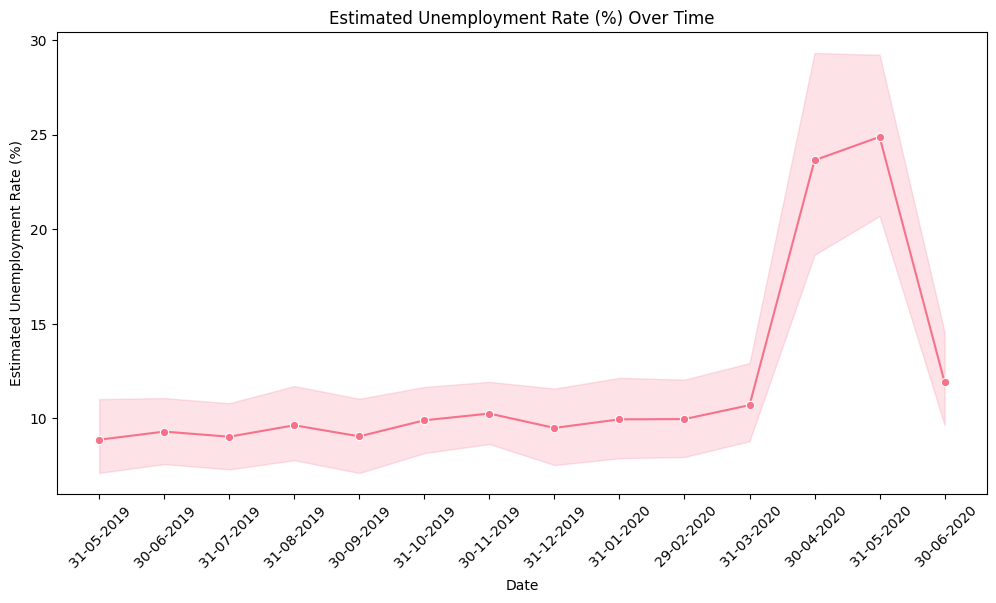

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, marker='o')
plt.title('Estimated Unemployment Rate (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# **Pie chart for Area distribution**

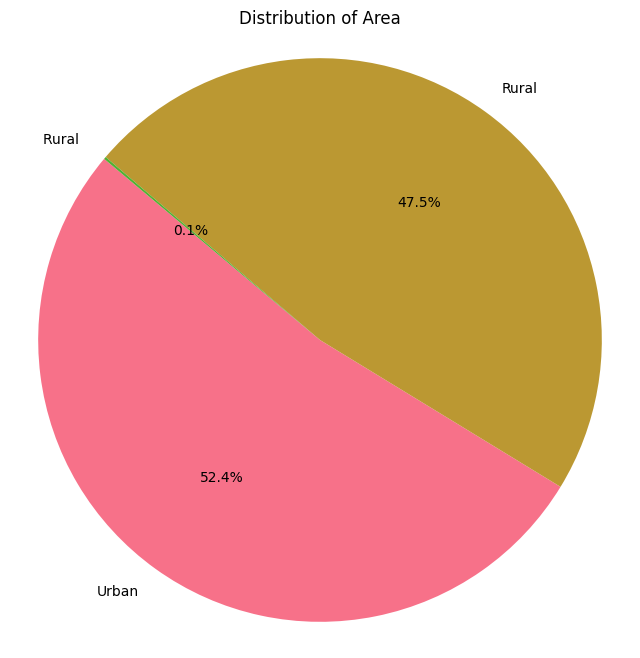

In [13]:
area_counts = df['Area'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Area')
plt.axis('equal')
plt.show()

# **Correlation Matrix**

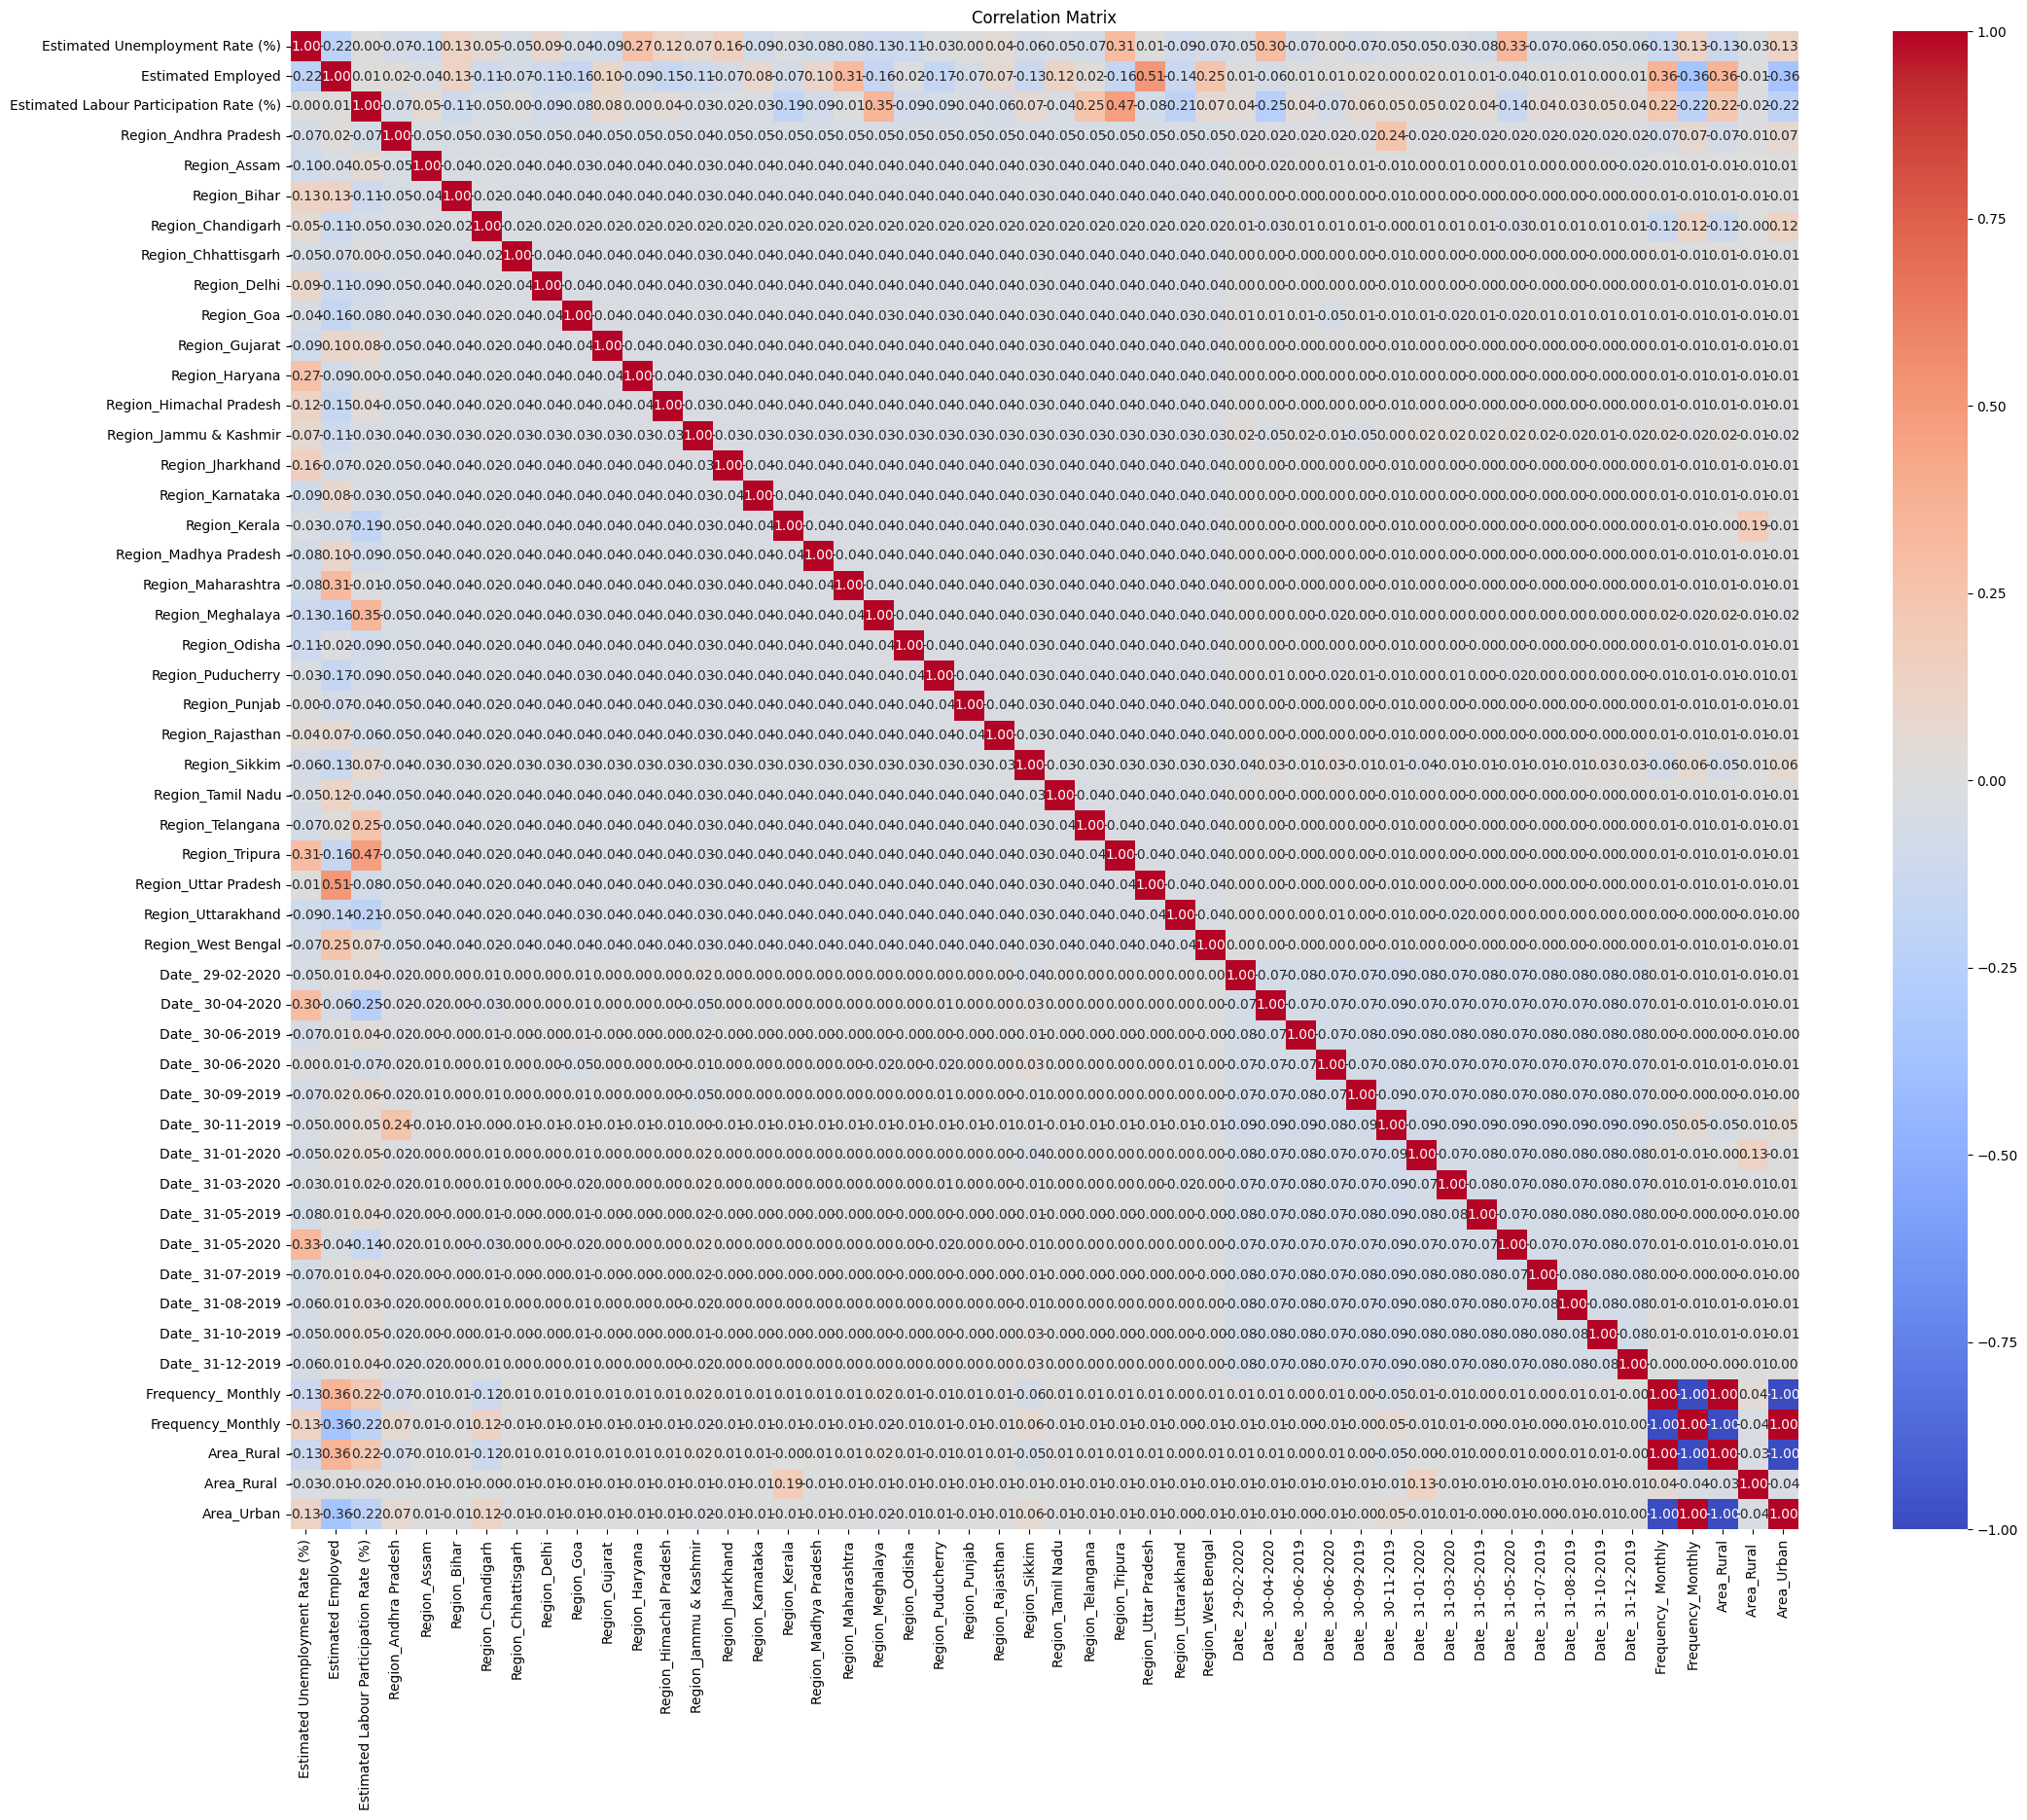

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **Relationship between unemployment rate, employed, and region**

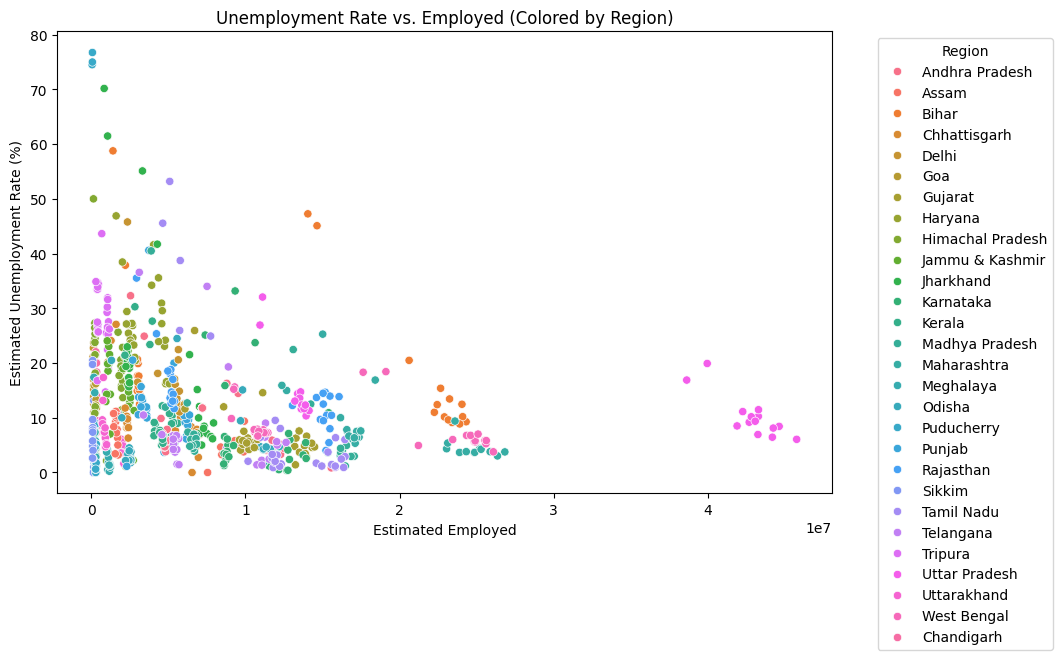

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title('Unemployment Rate vs. Employed (Colored by Region)')
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Trend of unemployment rate over time**

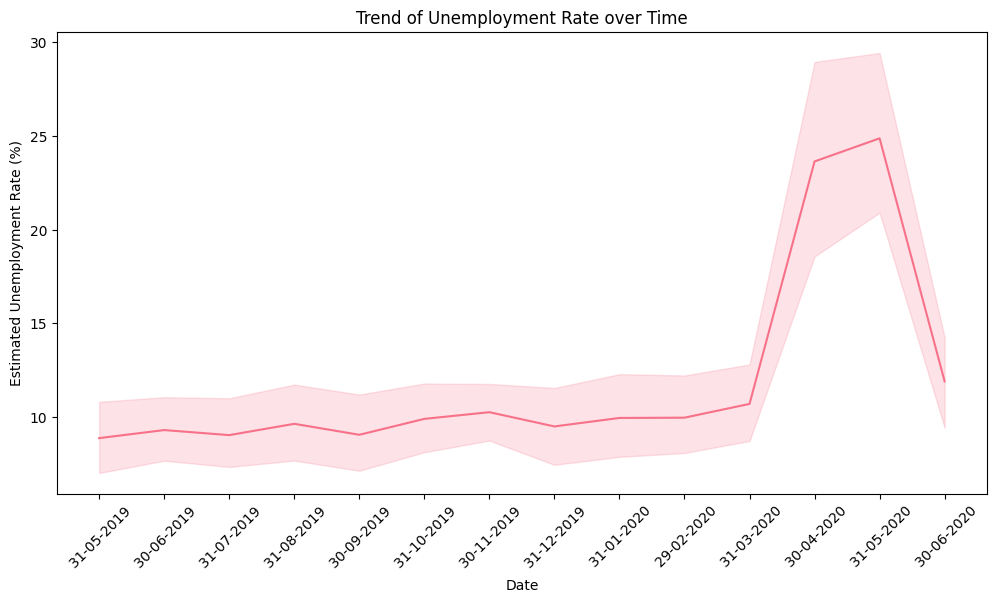

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Trend of Unemployment Rate over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()